## Student Graduate Acceptance Probability Prediction using Multiple Linear Regression

Created by: Ardian Kris Bramantyo

Date: June 22, 2022

Dataset : https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [3]:
df = pd.read_csv('Admission.csv')

### Data Exploration

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admission Chance   400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
df = df.drop(['Serial No.'], axis = 1)

In [10]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Data Visualization

In [11]:
column_headers = df.columns.values
column_headers

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Admission Chance'], dtype=object)

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samsung\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samsung\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

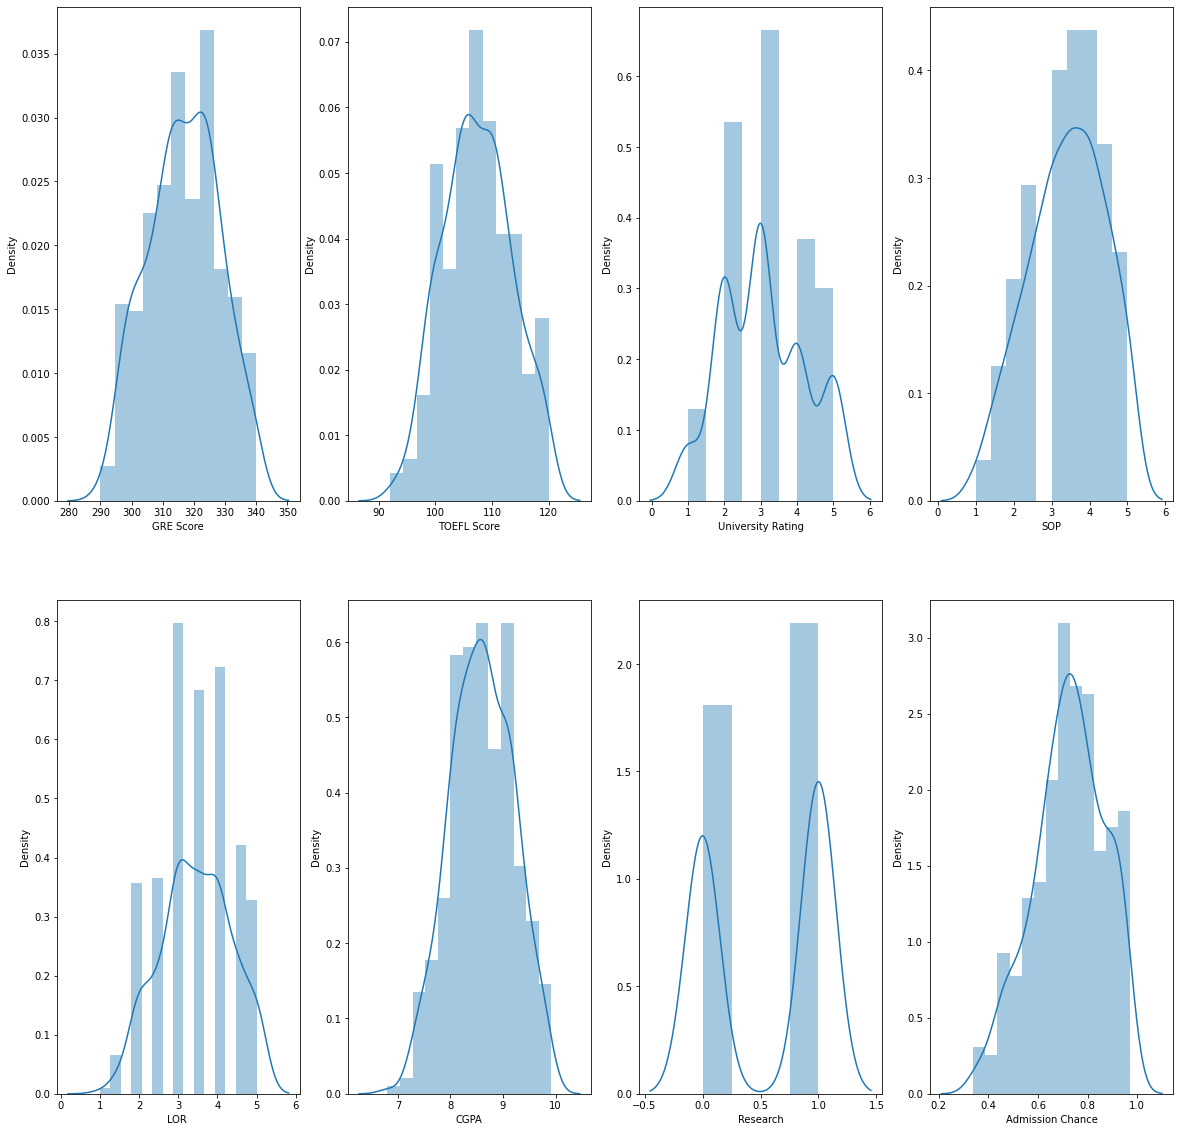

In [18]:
i = 1 
fig, ax = plt.subplots(2,4, figsize=(20,20))

for column_header in column_headers:
    plt.subplot(2,4,i)
    sns.distplot(df[column_header])
    i += 1

<AxesSubplot:>

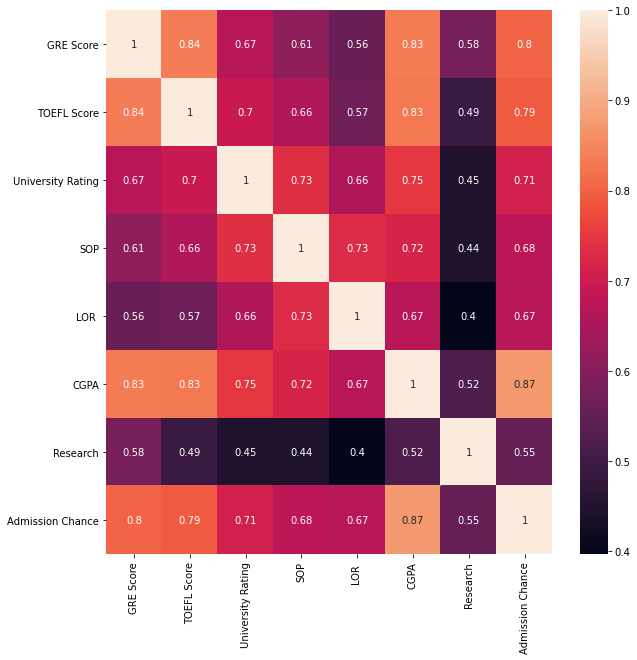

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

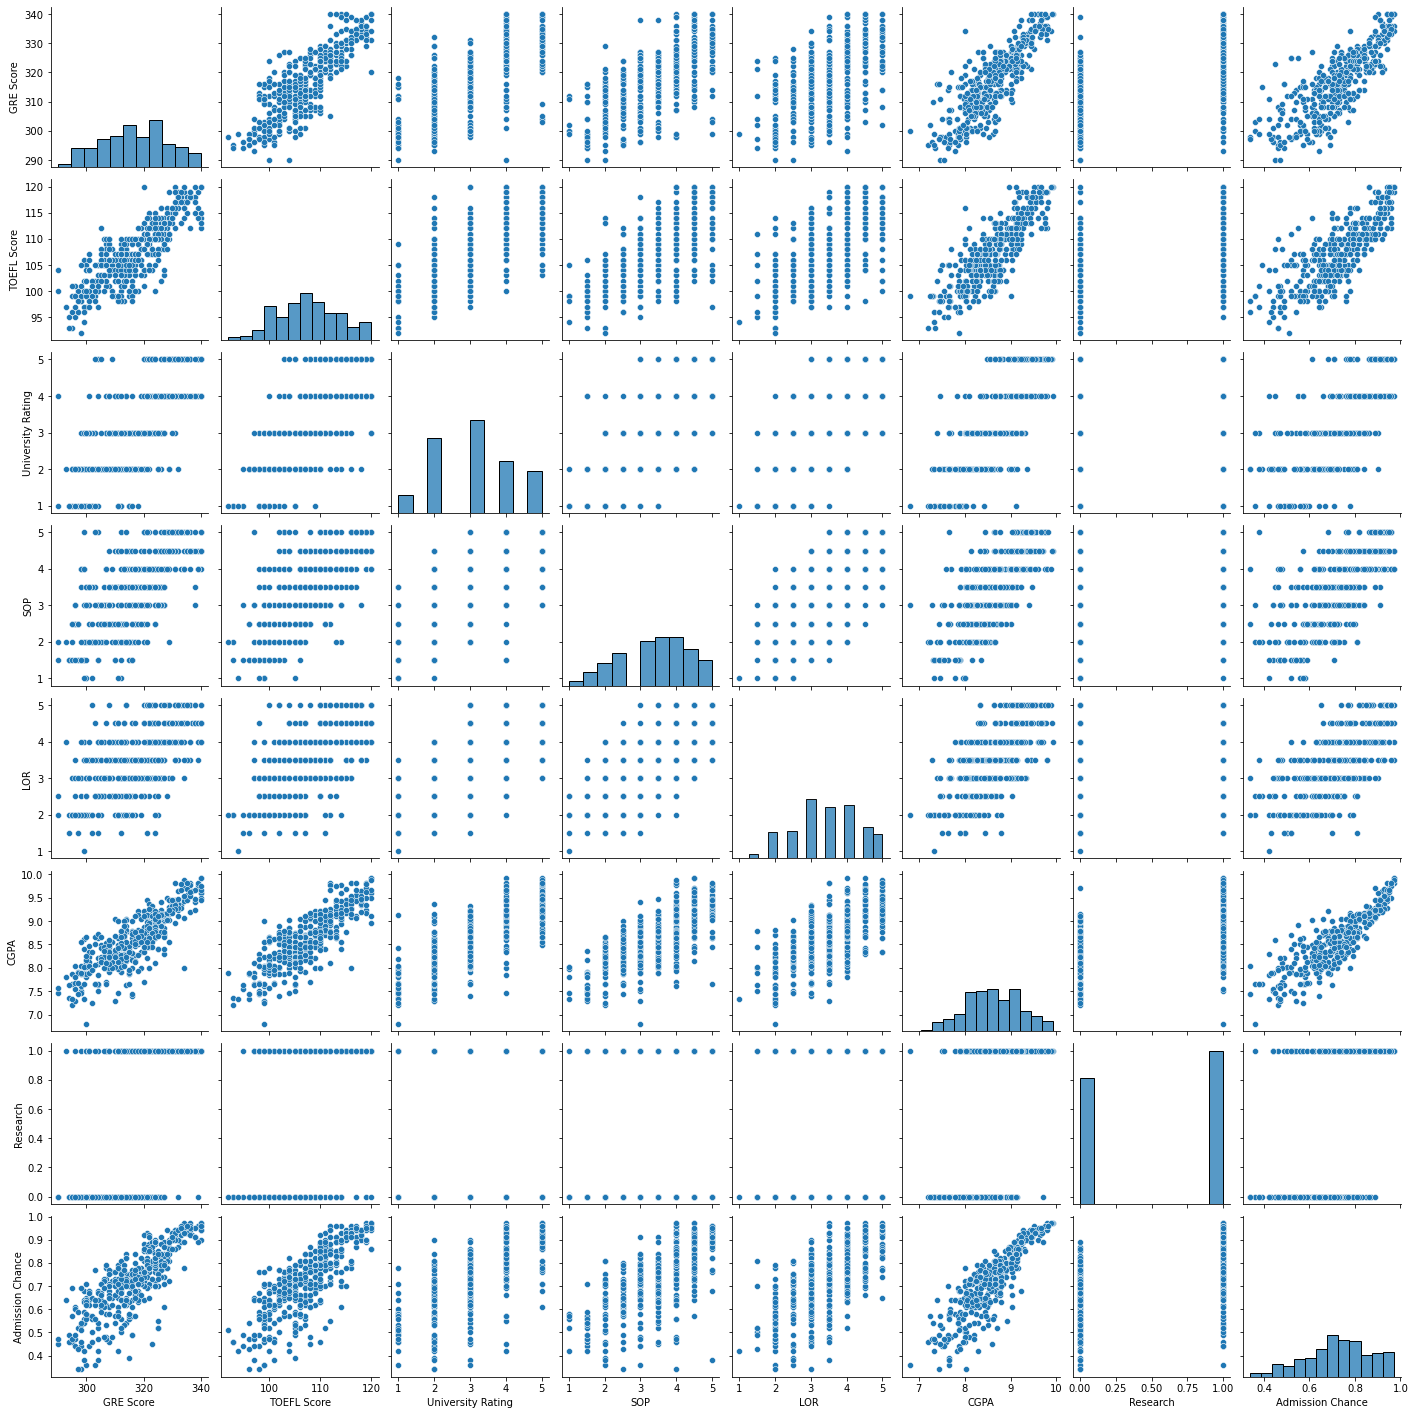

In [21]:
sns.pairplot(df)

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\samsung\anaconda

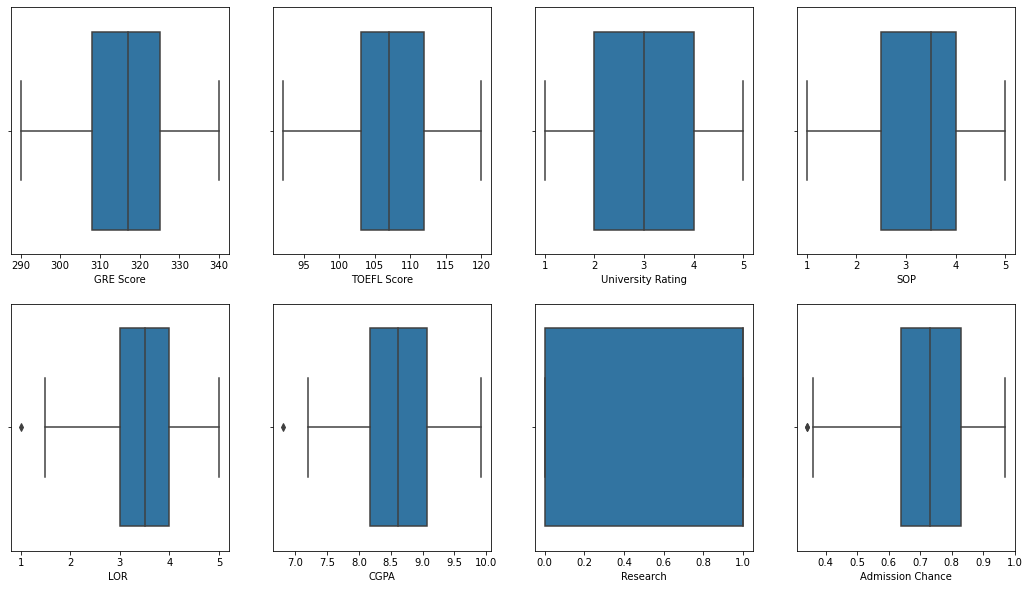

In [24]:
i = 1 
fig, ax = plt.subplots(2,4, figsize=(18,10))

for column_header in column_headers:
    plt.subplot(2,4,i)
    sns.boxplot(df[column_header])
    i += 1

### Create Training and Testing Dataset

Check for null element

<AxesSubplot:>

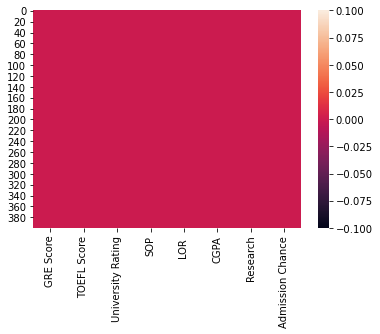

In [25]:
sns.heatmap(df.isnull())

In [27]:
X = df.drop(['Admission Chance'], axis = 1)

In [28]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [31]:
y = df['Admission Chance']

In [32]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Admission Chance, Length: 400, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [34]:
X_train.shape

(320, 7)

In [35]:
X_test.shape

(80, 7)

### Training the Model

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
print('Linear Model Coeff (m) ', regressor.coef_)
print('Linear Model Coeff (b) ', regressor.intercept_)

Linear Model Coeff (m)  [ 0.00150603  0.00245197  0.00426363 -0.00109522  0.02522161  0.12638689
  0.02412924]
Linear Model Coeff (b)  -1.2138132315021801


### Model Evaluation

In [39]:
y_predict = regressor.predict(X_test)

Text(0.5, 0, 'True (Ground Truth)')

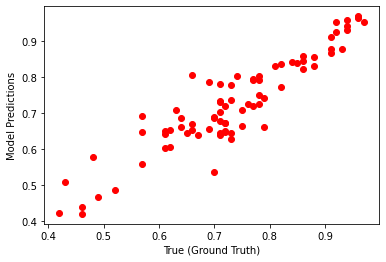

In [43]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True (Ground Truth)')

In [65]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

In [45]:
k

7

In [46]:
n

80

In [51]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - (1-r2)*(n-1)/(n-k-1)
MAPE = np.mean(np.abs((y_test - y_predict)/y_test)) * 100

print('RMSE = ', RMSE, '\nMSE = ', MSE, '\nMAE = ', MAE, '\nr2 = ', r2, '\nadj r2 = ', adj_r2, '\nMAPE = ', MAPE, '%')

RMSE =  0.052 
MSE =  0.0027498351047701578 
MAE =  0.03917482239934656 
r2 =  0.8455278990663619 
adj r2 =  0.8305097781422582 
MAPE =  5.720851739658409 %


### Model Retrain & Result Visualization

In [54]:
X = df[['TOEFL Score','CGPA']]
y = df['Admission Chance']

In [53]:
X

,TOEFL Score,CGPA
0,118,9.65
1,107,8.87
2,104,8.00
3,110,8.67
4,103,8.21
...,...,...
395,110,9.04
396,107,9.11
397,116,9.45
398,103,8.78


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [61]:
X_train

,TOEFL Score,CGPA
353,102,8.17
196,105,8.26
170,101,8.04
386,101,7.96
192,114,8.94
...,...,...
234,113,9.31
228,112,8.67
300,106,8.00
253,115,9.68


In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression()

In [57]:
y_predict = regressor.predict(X_test)

Text(0.5, 0, 'True (Ground Truth)')

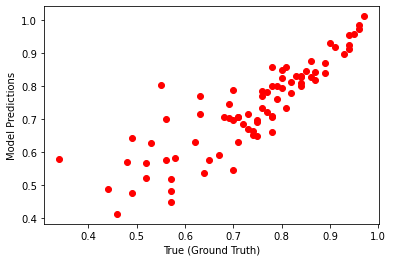

In [58]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True (Ground Truth)')

In [63]:
X_test.shape

(80, 2)

In [68]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - (1-r2)*(n-1)/(n-k-1)
MAPE = np.mean(np.abs((y_test - y_predict)/y_test)) * 100

print('RMSE = ', RMSE, '\nMSE = ', MSE, '\nMAE = ', MAE, '\nr2 = ', r2, '\nadj r2 = ', adj_r2, '\nMAPE = ', MAPE, '%')

RMSE =  0.071 
MSE =  0.005069743259815516 
MAE =  0.051186051408023334 
r2 =  0.7423663440830165 
adj r2 =  0.7356745608124455 
MAPE =  8.129417540982281 %


In [71]:
from mpl_toolkits.mplot3d import Axes3D
x_surf, y_surf = np.meshgrid(np.linspace(df['TOEFL Score'].min(), df['TOEFL Score'].max(),100), np.linspace(df['CGPA'].min(), df['CGPA'].max(),100))
onlyX = pd.DataFrame({'TOEFL Score': x_surf.ravel(), 'CGPA':y_surf.ravel()})
fittedY = regressor.predict(onlyX)
fittedY = fittedY.reshape(x_surf.shape)

Text(0.5, 0, 'Acceptance Chance')

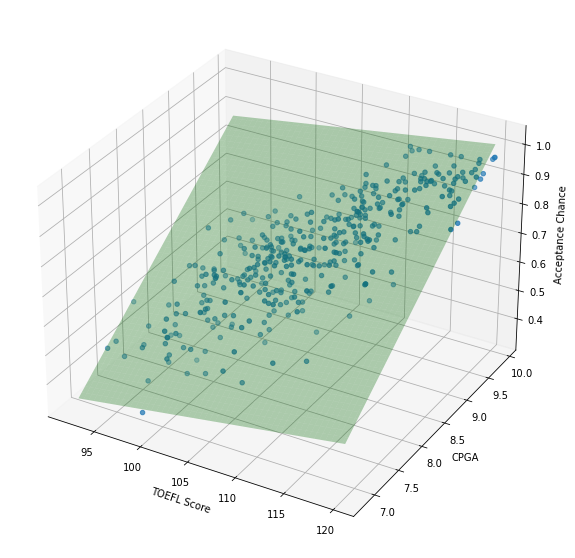

In [78]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['TOEFL Score'], df['CGPA'], df['Admission Chance'])
ax.plot_surface(x_surf, y_surf, fittedY, color ='green', alpha = 0.3)
ax.set_xlabel('TOEFL Score')
ax.set_ylabel('CPGA')
ax.set_zlabel('Acceptance Chance')